In [1]:
import pandas as pd

dataset = pd.read_csv('heart.csv').values
#this code read the whole dataset and store it in a numpy array

data = dataset[:,0:13]
#Features

target = dataset[:,13]
#labels

print("data : ")
print(data[:5])
print("target : ")
print(target[:5])
print("size data: ", len(data))
print("size target: ", len(target))
print("type: ", type(data))

data : 
[[ 63.    1.    3.  145.  233.    1.    0.  150.    0.    2.3   0.    0.
    1. ]
 [ 37.    1.    2.  130.  250.    0.    1.  187.    0.    3.5   0.    0.
    2. ]
 [ 41.    0.    1.  130.  204.    0.    0.  172.    0.    1.4   2.    0.
    2. ]
 [ 56.    1.    1.  120.  236.    0.    1.  178.    0.    0.8   2.    0.
    2. ]
 [ 57.    0.    0.  120.  354.    0.    1.  163.    1.    0.6   2.    0.
    2. ]]
target : 
[1. 1. 1. 1. 1.]
size data:  303
size target:  303
type:  <class 'numpy.ndarray'>


In [2]:
from keras.layers import Dense 
#densly connected layers

from keras.models import Sequential

from keras.layers import LeakyReLU

model = Sequential()
#model is a empty NN, Sequential -> creating NN by keras, layer by layer

model.add(Dense(13))
#1st hidden layer (dense type-fully connected)
#13 - input neuron in input layer

model.add(LeakyReLU(alpha=0.5))

model.add(Dense(7, input_dim = 13, activation = 'relu'))
#2st hidden layer (dense type-fully connected)

model.add(Dense(2, input_dim = 7, activation = 'softmax'))
#final layer

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])


Using TensorFlow backend.


In [3]:
from sklearn.model_selection import train_test_split

train_data, test_data, train_target, test_target = train_test_split(data, target, test_size = 0.2)
#20% of data for test

In [4]:
from keras.utils import np_utils

print("train_target : ")
print(train_target[:5])

new_train_target = np_utils.to_categorical(train_target)
#categoring labels to numbers array

print("new_train_target : ")
print(new_train_target[:5])

train_target : 
[1. 0. 1. 0. 0.]
new_train_target : 
[[0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]]


In [5]:
history = model.fit(train_data, new_train_target, epochs = 100)
#model.fit to train the NN

Epoch 1/100
242/242 [==============================] - 0s 506us/step - loss: 64.4810 - accuracy: 0.5579
Epoch 2/100
242/242 [==============================] - 0s 70us/step - loss: 48.4605 - accuracy: 0.5579
Epoch 3/100
242/242 [==============================] - 0s 74us/step - loss: 31.9005 - accuracy: 0.5579
Epoch 4/100
242/242 [==============================] - 0s 79us/step - loss: 14.4144 - accuracy: 0.5331
Epoch 5/100
242/242 [==============================] - 0s 70us/step - loss: 8.5931 - accuracy: 0.3802
Epoch 6/100
242/242 [==============================] - 0s 79us/step - loss: 8.7135 - accuracy: 0.3967
Epoch 7/100
242/242 [==============================] - 0s 75us/step - loss: 6.1855 - accuracy: 0.4298
Epoch 8/100
242/242 [==============================] - 0s 79us/step - loss: 6.3928 - accuracy: 0.4917
Epoch 9/100
242/242 [==============================] - 0s 75us/step - loss: 5.5412 - accuracy: 0.4421
Epoch 10/100
242/242 [==============================] - 0s 75us/step - loss: 

242/242 [==============================] - 0s 66us/step - loss: 0.4333 - accuracy: 0.8388
Epoch 81/100
242/242 [==============================] - 0s 70us/step - loss: 0.4697 - accuracy: 0.7934
Epoch 82/100
242/242 [==============================] - 0s 70us/step - loss: 0.4573 - accuracy: 0.8099
Epoch 83/100
242/242 [==============================] - 0s 62us/step - loss: 0.4242 - accuracy: 0.8347
Epoch 84/100
242/242 [==============================] - 0s 62us/step - loss: 0.4085 - accuracy: 0.8264
Epoch 85/100
242/242 [==============================] - 0s 62us/step - loss: 0.4036 - accuracy: 0.8182
Epoch 86/100
242/242 [==============================] - 0s 70us/step - loss: 0.4056 - accuracy: 0.8306
Epoch 87/100
242/242 [==============================] - 0s 66us/step - loss: 0.3992 - accuracy: 0.8223
Epoch 88/100
242/242 [==============================] - 0s 62us/step - loss: 0.3986 - accuracy: 0.8264
Epoch 89/100
242/242 [==============================] - 0s 54us/step - loss: 0.4354 - 

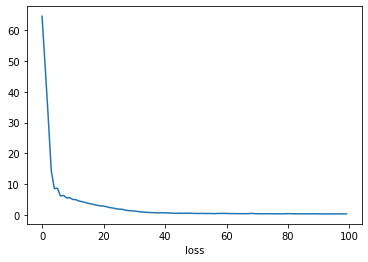

In [11]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'])
plt.xlabel('# epochs')
plt.xlabel('loss')
plt.show()

#chart for show varing loss with epochs

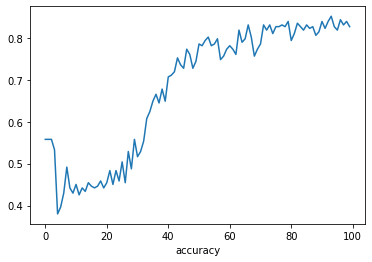

In [7]:
plt.plot(history.history['accuracy'])
plt.xlabel('# epochs')
plt.xlabel('accuracy')
plt.show()

#chart for show varing accuracy with epochs

In [8]:
predicted_target = model.predict(test_data)

print(predicted_target)

#test_data and test_target in order to test the NN model using model.predict().

[[2.76237249e-01 7.23762691e-01]
 [3.95118259e-02 9.60488200e-01]
 [2.00664133e-01 7.99335897e-01]
 [6.77165091e-02 9.32283401e-01]
 [8.39772940e-01 1.60227016e-01]
 [1.21833414e-01 8.78166556e-01]
 [2.23488256e-01 7.76511729e-01]
 [9.53792930e-01 4.62070964e-02]
 [7.56708860e-01 2.43291125e-01]
 [3.63831334e-02 9.63616908e-01]
 [9.89669934e-02 9.01032984e-01]
 [4.58690077e-02 9.54131007e-01]
 [8.28281164e-01 1.71718866e-01]
 [8.60347092e-01 1.39652833e-01]
 [4.38629270e-01 5.61370730e-01]
 [2.51305737e-02 9.74869430e-01]
 [2.38623664e-01 7.61376381e-01]
 [7.38037527e-01 2.61962503e-01]
 [9.02425796e-02 9.09757376e-01]
 [3.51169184e-02 9.64883149e-01]
 [5.66635013e-01 4.33364987e-01]
 [3.14394146e-01 6.85605824e-01]
 [9.36272681e-01 6.37272820e-02]
 [3.88899028e-01 6.11100972e-01]
 [1.98181748e-01 8.01818252e-01]
 [2.02313900e-01 7.97686160e-01]
 [3.01275197e-02 9.69872415e-01]
 [8.24605405e-01 1.75394580e-01]
 [2.06288785e-01 7.93711185e-01]
 [9.61925864e-01 3.80741954e-02]
 [5.615258

In [9]:
import numpy as np

print('Predicted Labels:',np.argmax(predicted_target,axis=1))
print('Actual Labels:',test_target)

#Using np.argmax(predicted_target,axis=1) the corresponding index (label) can be obtained. 
#This gives the index corresponding to the maximum value of each row, 
#which is equal to the label having the maximum probability.axis=1 is given to get the maximum value of each row.

Predicted Labels: [1 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 0 1 1 0 1 0 1 1 1 1 0 1 0 1 1 1 0 0 1 1
 1 1 0 1 0 0 1 0 1 0 1 1 0 1 1 1 0 0 0 1 1 1 0 1]
Actual Labels: [1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1.
 1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1.]


In [10]:
new_test_target = np_utils.to_categorical(test_target)

evaluations = model.evaluate(test_data,new_test_target)
print(evaluations)

# display [loss, accuracy]

61/61 [==============================] - 0s 256us/step
[0.47812521750809717, 0.8196721076965332]
